In [1]:
%%time
import time

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd


sns.set(style='white', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


CPU times: user 3.26 s, sys: 659 ms, total: 3.91 s
Wall time: 7.93 s


In [2]:
start = time.time()
s = 1250
arr = [int(0.2*s),int(0.05*s),int(0.1*s),int(0.16*s),int(0.12*s),int(0.1*s),int(0.04*s),int(0.08*s),int(0.15*s)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, cluster_std=1)


In [3]:
data

array([[ 3.18553328, -2.23800626],
       [-5.14268612,  0.25402708],
       [ 4.61089272,  0.0287853 ],
       ...,
       [ 4.27528747, -7.75157469],
       [-7.28320263,  8.54299635],
       [-5.45890361, -0.19076699]])

In [30]:
import pickle

In [3]:
start = time.time()
s = 1250
arr = [int(0.2*s),int(0.05*s),int(0.1*s),int(0.16*s),int(0.12*s),int(0.1*s),int(0.04*s),int(0.08*s),int(0.15*s)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, cluster_std=1)

time1= time.time()
print("Data creation: ",time1-start)

r = np.random.RandomState(10)

coo_matrix1 = umap.fuzzy_simplicial_set(data,30,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)

time2 = time.time()
print("Fuzzy simplicial:",time2-time1,"   ||| From start: ",time2-start)

#repeat
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz())

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)

time3 = time.time()
print("Graph formation:",time3-time2,"   ||| From start: ",time3-start)


Data creation:  0.0037369728088378906
Fuzzy simplicial: 6.511224031448364    ||| From start:  6.514961004257202
Graph formation: 0.32553577423095703    ||| From start:  6.840496778488159


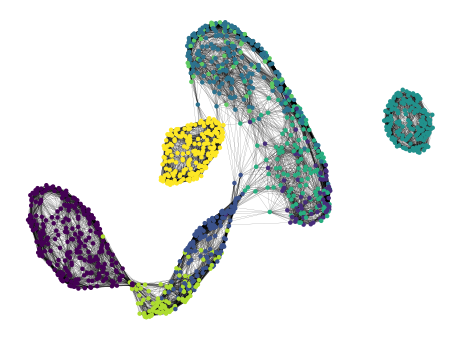

In [4]:
fig, ax = plt.subplots()
my_pos = nx.spring_layout(G1,seed =10)
pos13 = nx.draw_networkx(G1,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")
plt.savefig("./results/ppt/graphs/pre-umap/Original.png")

In [18]:
import pickle
filename = './results/graphs/graph_rem_23'
outfile = open(filename,'wb')
pickle.dump(G1,outfile)
outfile.close()

In [ ]:
edge_w = nx.get_edge_attributes(G1,'weight')
len(edge_w)
G1.remove_edges_from((e for e, w in edge_w.items() if w < 0.05))
time5 = time.time()
print("Removing edges: ", time5- time3,"   ||| From start: ",time5-start)
edge_w2 = nx.get_edge_attributes(G1,'weight')

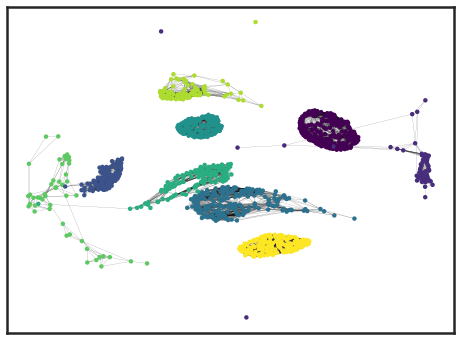

In [21]:
fig, ax = plt.subplots()
my_pos = nx.spring_layout(G1,seed =13)
pos13 = nx.draw_networkx(G1,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)

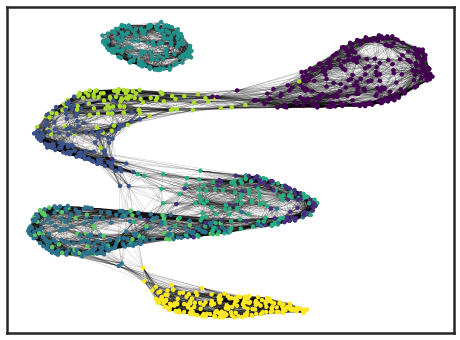

In [66]:
fig, ax = plt.subplots()
my_pos = nx.spring_layout(G1,seed =13)
pos13 = nx.draw_networkx(G1,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)

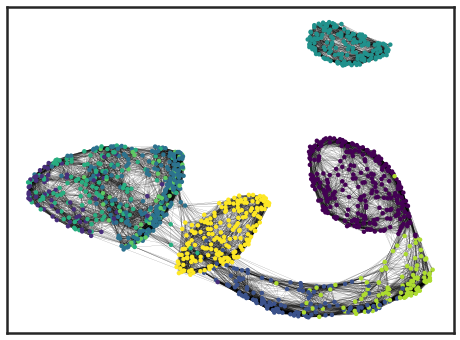

In [46]:
fig, ax = plt.subplots()
my_pos = nx.spring_layout(G1,seed =16)
nx.draw_networkx(G1,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)

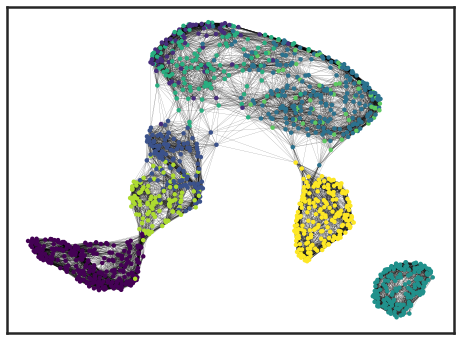

In [49]:
fig, ax = plt.subplots()
my_pos = nx.spring_layout(G1,seed =19)
nx.draw_networkx(G1,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)

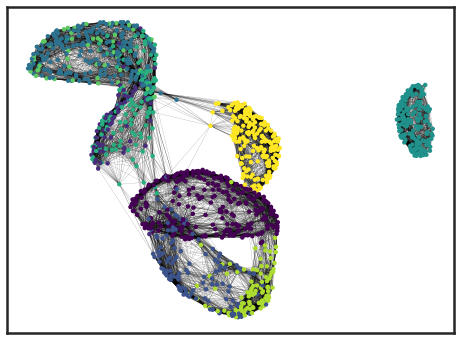

In [50]:
fig, ax = plt.subplots()
my_pos = nx.spring_layout(G1,seed =20)
nx.draw_networkx(G1,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)

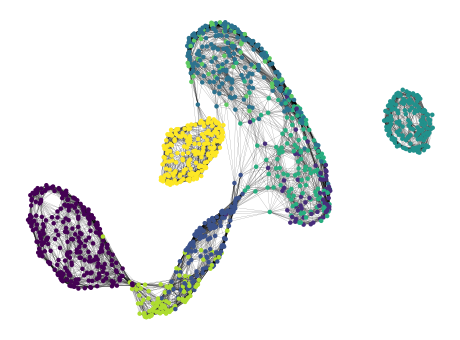

In [5]:

G2 = G1
edge_w = nx.get_edge_attributes(G2,'weight')
len(edge_w)
G2.remove_edges_from((e for e, w in edge_w.items() if w < 0.05))
edge_w2 = nx.get_edge_attributes(G2,'weight')
fig, ax = plt.subplots()
nx.draw_networkx(G2,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")
plt.savefig("./results/ppt/graphs/pre-umap/Remove_23%_edges.png")

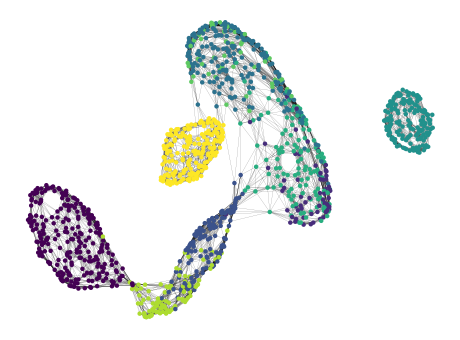

In [6]:
G3 = G1
edge_w = nx.get_edge_attributes(G3,'weight')
len(edge_w)
G3.remove_edges_from((e for e, w in edge_w.items() if w < 0.1))
edge_w2 = nx.get_edge_attributes(G3,'weight')
fig, ax = plt.subplots()
nx.draw_networkx(G3,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")
plt.savefig("./results/ppt/graphs/pre-umap/Remove_43%_edges.png")

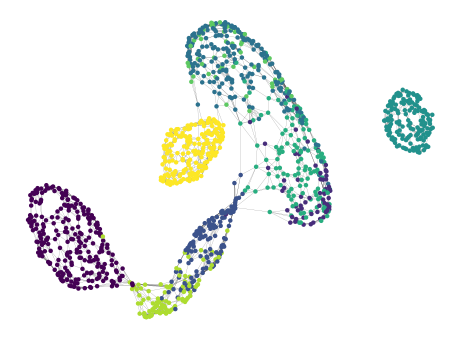

In [7]:
G4 = G1
edge_w = nx.get_edge_attributes(G4,'weight')
len(edge_w)
G4.remove_edges_from((e for e, w in edge_w.items() if w < 0.3))
edge_w2 = nx.get_edge_attributes(G4,'weight')
fig, ax = plt.subplots()
nx.draw_networkx(G4,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")

plt.savefig("./results/ppt/graphs/pre-umap/Remove_74%_edges.png")

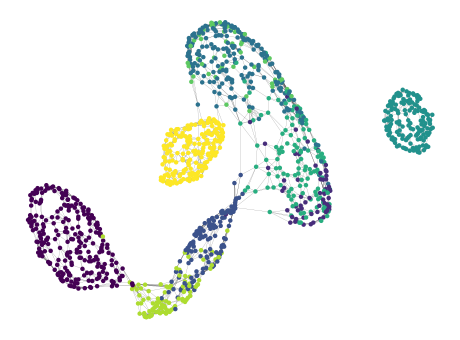

In [10]:
G5 = G1
ss = sorted(G5.degree, key=lambda x: x[1], reverse=True)
k1=round(1/100 * len(ss))  ## top n percent of highest degree nodes   ##############################################################################################
ss1= [i[0] for i in ss]
ss_final = ss1[:k1]

for i in ss_final:
    k2=round(80/100 * len(G5.edges(i)))  ## removing random 80% edges/connections of each selected superspreader
    list1 = list(G5.edges(i))
    to_remove=random.sample(list1,k2)
    G5.remove_edges_from(to_remove)
    
fig, ax = plt.subplots()
nx.draw_networkx(G5,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")

plt.savefig("./results/ppt/graphs/pre-umap/superspreader_1%.png")

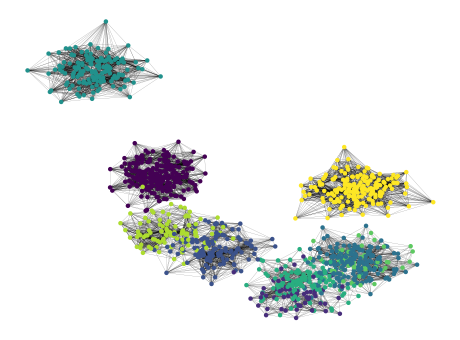

In [8]:
G= G1
edge_w= nx.get_edge_attributes(G,'weight')
temp = nx.Graph()

for i in range(len(data)):
    temp.add_node(i,pos=(data[i][0],data[i][1]))
    
pos=nx.get_node_attributes(temp,'pos')
le = list(edge_w)

to_rem = []
for i in range(len(le)):
    if(y[le[i][0]]!=y[le[i][1]]):
        edge_w[le[i]] = 5
        

G.remove_edges_from((e for e, w in edge_w.items() if w == 5))
my_pos = nx.spring_layout(G1,seed =13)
fig, ax = plt.subplots()


nx.draw_networkx(G,pos= pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")
plt.savefig("./results/ppt/graphs/pre-umap/layout_data_cld.png")

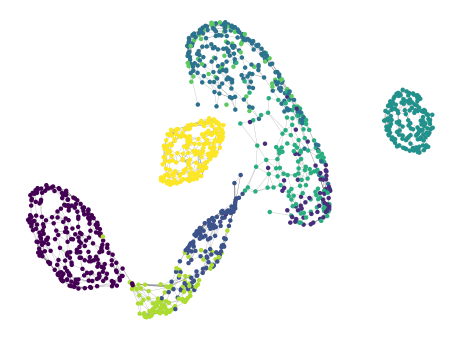

In [11]:
G= G1
edge_w= nx.get_edge_attributes(G,'weight')
temp = nx.Graph()

for i in range(len(data)):
    temp.add_node(i,pos=(data[i][0],data[i][1]))
    
pos=nx.get_node_attributes(temp,'pos')
le = list(edge_w)

to_rem = []
for i in range(len(le)):
    if(y[le[i][0]]!=y[le[i][1]]):
        edge_w[le[i]] = 5
        

G.remove_edges_from((e for e, w in edge_w.items() if w == 5))
fig, ax = plt.subplots()


nx.draw_networkx(G,pos= my_pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")
plt.savefig("./results/ppt/graphs/pre-umap/inter_cluster_remove_graph.png")

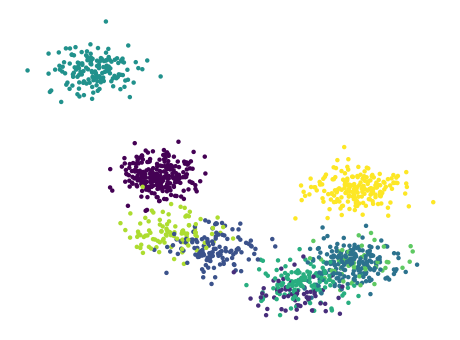

In [11]:

edge_w= nx.get_edge_attributes(G1,'weight')
temp = nx.Graph()

for i in range(len(data)):
    temp.add_node(i,pos=(data[i][0],data[i][1]))
    
pos=nx.get_node_attributes(temp,'pos')
fig, ax = plt.subplots()

nx.draw_networkx(temp,pos=pos,width=0.2,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")
plt.savefig("./results/ppt/graphs/original_data.png")

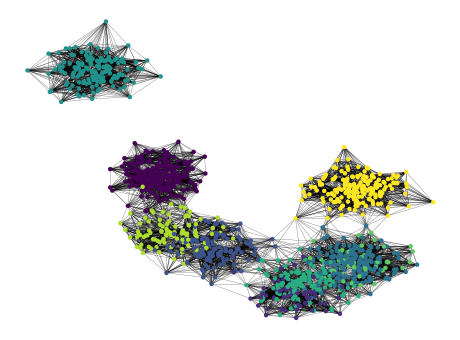

In [5]:
edge_w= nx.get_edge_attributes(G1,'weight')
temp = nx.Graph()

for i in range(len(data)):
    temp.add_node(i,pos=(data[i][0],data[i][1]))
    
pos=nx.get_node_attributes(temp,'pos')
fig, ax = plt.subplots()
pos13 = nx.draw_networkx(G1,pos= pos,width=0.2,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)

ax.axis('off')
plt.savefig("./results/ppt/graphs/original_data_with_edges.png")

In [ ]:
fig, ax = plt.subplots()
my_pos = nx.spring_layout(G1,seed =13)
pos13 = nx.draw_networkx(G,pos= pos,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)

In [10]:
mapper = umap.UMAP(n_neighbors=30,min_dist=0.1).fit(data)
coo_graph = mapper.graph_.tocoo()

Z = nx.from_scipy_sparse_matrix(coo_graph,edge_attribute='weight')

edges = Z.edges()
weights = [Z[u][v]['weight'] for u,v in edges]

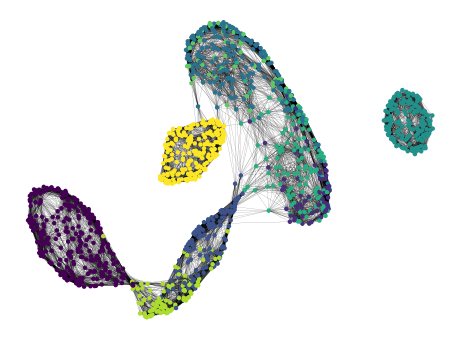

In [6]:
fig, ax = plt.subplots()
new_pos = nx.spring_layout(Z,seed =10)
nx.draw_networkx(Z,pos = new_pos,width = 0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis', edge_color='black')
ax.axis("off")
plt.savefig("./results/ppt/graphs/post-umap/original.png")

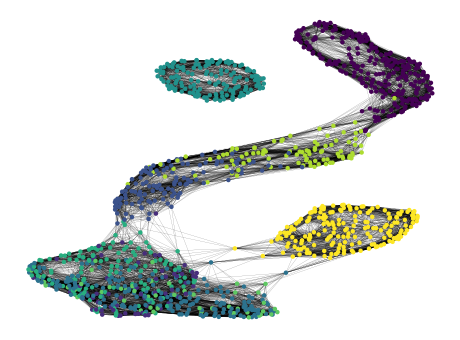

In [11]:
fig, ax = plt.subplots()
new_pos = nx.spring_layout(Z,seed =17)
nx.draw_networkx(Z,pos = new_pos,width = 0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis', edge_color='black')
ax.axis("off")
plt.savefig("./results/ppt/graphs/post-umap/original.png")

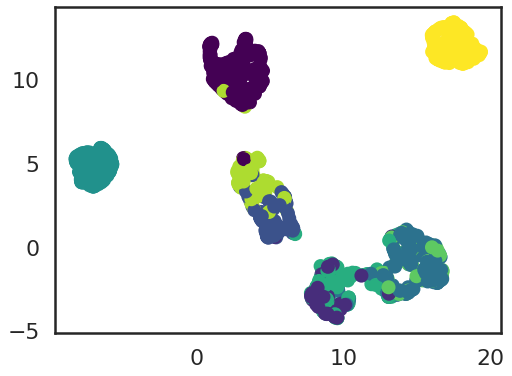

In [7]:
import umap.umap_ as umap
red = umap.UMAP()
embedding = red.fit_transform(data)
plt.scatter(embedding[:,0],embedding[:,1], c=y, cmap = 'viridis')

temp2 = nx.Graph()

for i in range(len(data)):
    temp2.add_node(i,pos=(embedding[i][0],embedding[i][1]))
    
upos=nx.get_node_attributes(temp2,'pos')

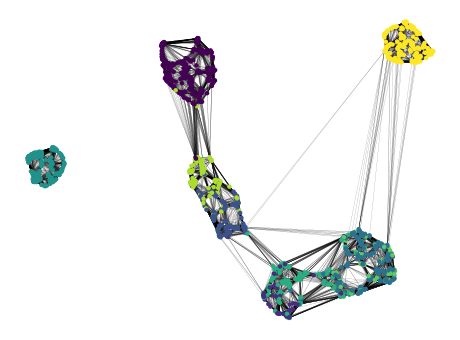

In [38]:
Z1= Z
edge_z = nx.get_node_attributes(Z, 'weight')
Z1.remove_edges_from((e for e, w in edge_z.items() if w < 0.05))
fig, ax = plt.subplots()
#new_pos = nx.spring_layout(Z1,seed =10)
nx.draw_networkx(Z1,pos = upos,width = 0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis', edge_color='black')
ax.axis("off")
plt.savefig("./results/ppt/graphs/post-umap/Remove_23%_edges.png")

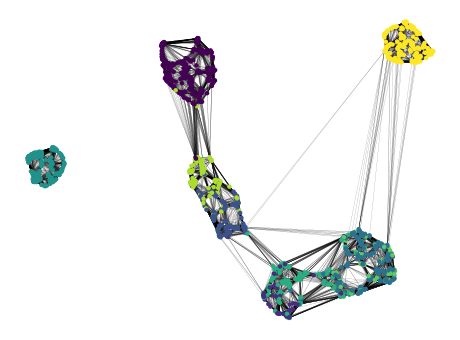

In [39]:
Z2= Z
edge_z = nx.get_node_attributes(Z, 'weight')
Z2.remove_edges_from((e for e, w in edge_z.items() if w < 0.1))
fig, ax = plt.subplots()
#new_pos = nx.spring_layout(Z1,seed =10)
nx.draw_networkx(Z2,pos = upos,width = 0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis', edge_color='black')
ax.axis("off")
plt.savefig("./results/ppt/graphs/post-umap/Remove_43%_edges.png")

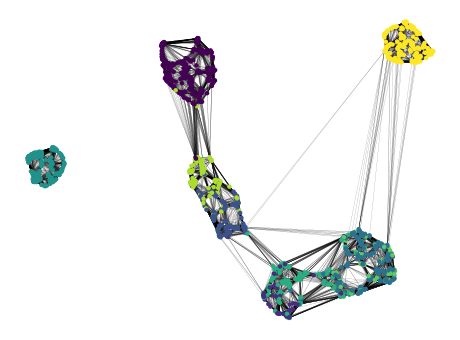

In [40]:
Z3= Z
edge_z = nx.get_node_attributes(Z, 'weight')
Z3.remove_edges_from((e for e, w in edge_z.items() if w < 0.05))
fig, ax = plt.subplots()
#new_pos = nx.spring_layout(Z1,seed =10)
nx.draw_networkx(Z3,pos = upos,width = 0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis', edge_color='black')
ax.axis("off")
plt.savefig("./results/ppt/graphs/post-umap/Remove_74%_edges.png")

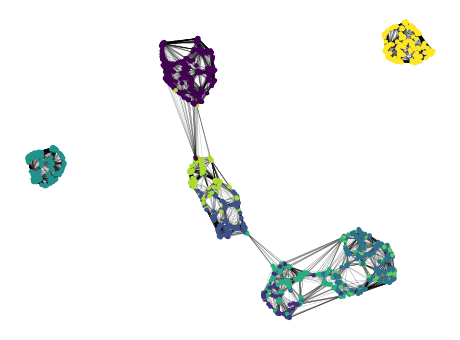

In [41]:
Z4= Z
edge_z = nx.get_node_attributes(Z, 'weight')

temp = nx.Graph()

for i in range(len(data)):
    temp.add_node(i,pos=(data[i][0],data[i][1]))
    
pos=nx.get_node_attributes(temp,'pos')
le = list(edge_w)

to_rem = []
for i in range(len(le)):
    if(y[le[i][0]]!=y[le[i][1]]):
        edge_w[le[i]] = 5
        

Z4.remove_edges_from((e for e, w in edge_w.items() if w == 5))
fig, ax = plt.subplots()
#new_pos = nx.spring_layout(Z1,seed =10)
nx.draw_networkx(Z4,pos = upos,width = 0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis', edge_color='black')
ax.axis("off")
plt.savefig("./results/ppt/graphs/post-umap/inter_cluster_remove_graph.png")

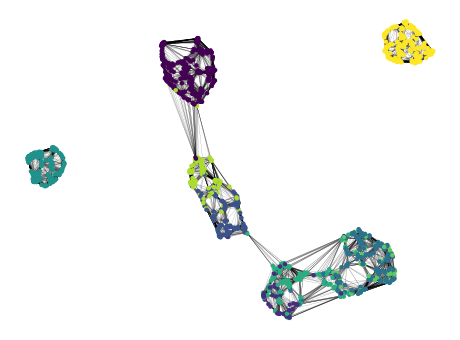

In [53]:
Z5= Z
edge_z = nx.get_node_attributes(Z, 'weight')

ss = sorted(Z5.degree, key=lambda x: x[1], reverse=True)
k1=round(5/100 * len(ss))  ## top n percent of highest degree nodes   ##############################################################################################
ss1= [i[0] for i in ss]
ss_final = ss1[:k1]

for i in ss_final:
    k2=round(80/100 * len(Z5.edges(i)))  ## removing random 80% edges/connections of each selected superspreader
    list1 = list(Z5.edges(i))
    to_remove=random.sample(list1,k2)
    Z5.remove_edges_from(to_remove)

fig, ax = plt.subplots()
#new_pos = nx.spring_layout(Z1,seed =10)
nx.draw_networkx(Z5,pos = upos,width = 0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis', edge_color='black')
ax.axis("off")
plt.savefig("./results/ppt/graphs/post-umap/superspreader_5%_fd.png")

In [5]:
from umap_ import *

In [51]:
knn_indices, knn_dists, _ = nearest_neighbors(
            data, n_neighbors=9, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )
sigmas, rhos = smooth_knn_dist(
        knn_dists, float(15), local_connectivity=float(1),
    )

Sun Sep  6 00:23:25 2020 Finding Nearest Neighbors
Sun Sep  6 00:23:25 2020 Building RP forest with 5 trees
Sun Sep  6 00:23:25 2020 NN descent for 6 iterations
	 0  /  6
	 1  /  6
	 2  /  6
	 3  /  6
Sun Sep  6 00:23:25 2020 Finished Nearest Neighbor Search


In [52]:
from matplotlib.patches import Circle

def draw_circle(position, radius,
                        ax=None, from_size=0.1, to_size=0.5, n_ellipses=3,
                        alpha=1, color=None,
                        **kwargs):
    ax = ax or plt.gca()
    # Draw the Ellipse
    for nsig in np.linspace(from_size, to_size, n_ellipses):
        ax.add_patch(Circle(position, nsig * radius, alpha=alpha, lw=0, color=color, **kwargs))

In [53]:
radii = []
for i in range(len(sigmas)):
    radii.append(int(max(knn_dists[i])))
dcolor = set(radii)
max(dcolor)

1

In [49]:
set(y)

{0, 1, 2, 3}

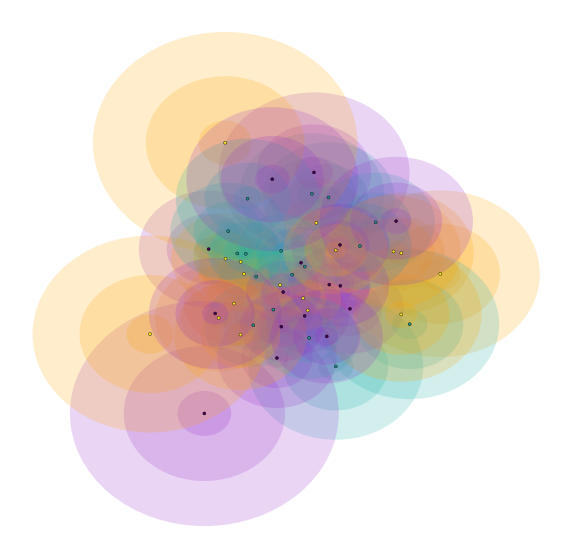

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#colors = plt.get_cmap('viridis')(np.linspace(0, 1, 3))
colors = ['darkorchid', 'lightseagreen', 'orange']
for i in range(len(sigmas)):
    pos = data[i, :2]
    draw_circle(pos, max(knn_dists[i]),
                        ax, color=colors[y[i]],
                        from_size=0.2, to_size=1.0, alpha=0.2)
ax.scatter(data[:,0],
           data[:,1],
           c= y, cmap = 'viridis',
           s=9, zorder = 2, linewidth= 0.4,  edgecolor= 'black')
ax.axis("off")
plt.savefig("./results/ppt/open_ball_plot.png")

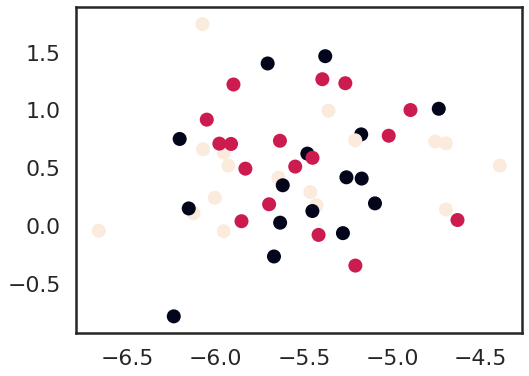

In [50]:
import random
s = 50
arr = [50]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, cluster_std=0.5)
for i in range (len(y)):
    y[i] = random.randint(0,2)
plt.scatter(data[:,0],data[:,1], c= y)

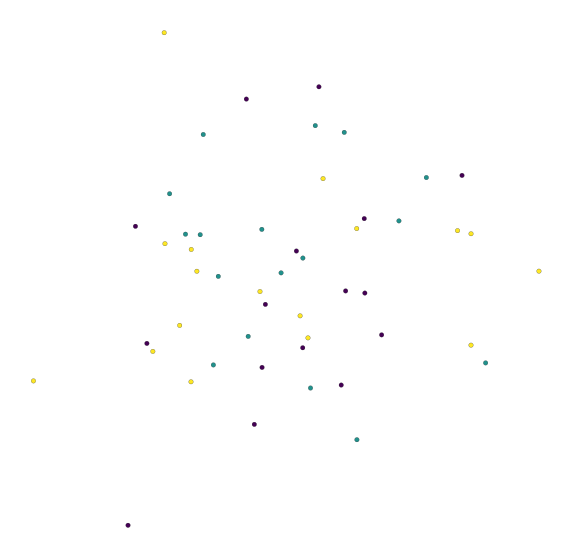

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(data[:,0],
           data[:,1],
           c= y, cmap = 'viridis',
           s=20, zorder = 2, linewidth= 0.2,  edgecolor= 'black')
ax.axis("off")
plt.savefig("./results/ppt/scatter_plot_random.png")

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#colors = plt.get_cmap('viridis')(np.linspace(0, 1, 3))
colors = ['darkorchid', 'lightseagreen', 'orange']
for i in range(len(sigmas)):
    pos = data[i, :2]
    draw_circle(pos, max(knn_dists[i]),
                        ax, color=colors[y[i]],
                        from_size=0.2, to_size=1.0, alpha=0.2)
ax.scatter(data[:,0],
           data[:,1],
           c= y, cmap = 'viridis',
           s=9, zorder = 2, linewidth= 0.4,  edgecolor= 'black')
ax.axis("off")
plt.savefig("./results/ppt/open_ball_plot.png")